# LRGB - CNN

## Load data

In [44]:
from skfp.datasets.lrgb import load_lrgb_mol_benchmark, load_lrgb_mol_splits

_, df = next(load_lrgb_mol_benchmark(as_frames=True))
df

,SMILES,aminoseq,antifungal,cell_cell_communication,anticancer,drug_delivery_vehicle,antimicrobial,antiviral,antihypertensive,antibacterial,antiparasitic,toxic
0,CC(C)C[C@H](NC(=O)[C@H](CCCC[NH3+])NC(=O)[C@@H...,VKLkVyPLKVKLyP,0,0,0,0,1,0,0,0,0,1
1,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](Cc1c[nH]cn1...,DVAHGILNEAYRKVLDQLSAGKHLQSLVARGVGGSLGGGAGDDAEPLS,0,1,0,0,0,0,0,0,0,0
2,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCCN...,FAVGLRAIKRALKKLRRGVRKVAKDL,0,0,1,0,0,0,0,0,0,0
3,CC[C@H](C)[C@@H]1NC(=O)[C@@H]2CSSC[C@H](NC(=O)...,AVCNLARCQLSCASLGLLGKCIGDKCECVKH,0,0,0,0,0,0,0,0,0,1
4,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,GKPRPYSPRPTSHPRPIRV,0,0,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15530,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,DKLIGSCVWGAVNYTSNCNAECKRRGYKGGHCGSFANINCWCET,1,0,0,0,1,0,0,0,0,0
15531,C[C@H](N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N1CCC[C@H...,AFP,0,0,0,0,0,0,1,0,0,0
15532,CC(C)C[C@H](NC(=O)CNC(=O)[C@H](CCC(N)=O)NC(=O)...,HSDGTFTSELSRLQDSARLQRLLQGLV,0,1,0,0,0,0,0,0,0,0
15533,CC[C@H](C)[C@H](N)C(=O)N[C@@H](CC(C)C)C(=O)N1C...,ILPFKFPFPFRR,0,0,0,0,1,0,0,0,0,1


In [45]:
label_names = df.columns[2:].tolist()
label_names

['antifungal',
 'cell_cell_communication',
 'anticancer',
 'drug_delivery_vehicle',
 'antimicrobial',
 'antiviral',
 'antihypertensive',
 'antibacterial',
 'antiparasitic',
 'toxic']

In [46]:
sequences = df['aminoseq'].tolist()
labels = df.iloc[:, 2:].values
sequences[0], labels[0].tolist()

('VKLkVyPLKVKLyP', [0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

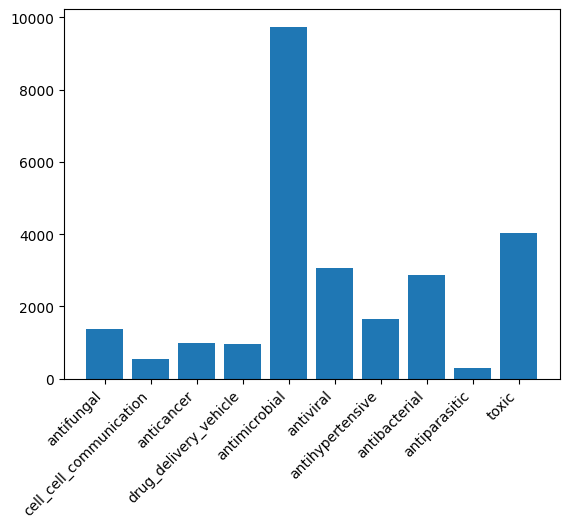

In [47]:
import matplotlib.pyplot as plt
plt.bar(label_names, labels.sum(axis=0))
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
splits = load_lrgb_mol_splits(dataset_name='Peptides-func', as_dict=True)
splits.keys()

dict_keys(['train', 'valid', 'test'])

In [49]:
train_sequences = []
test_sequences = []
y_train = []
y_test = []
for i in splits['train']:
    train_sequences.append(sequences[i])
    y_train.append(labels[i])
for i in splits['test']:
    test_sequences.append(sequences[i])
    y_test.append(labels[i])

print("Size of test set:", len(test_sequences) / (len(test_sequences) + len(train_sequences)))

Size of test set: 0.17653741290518024


Max length of sequences: 50


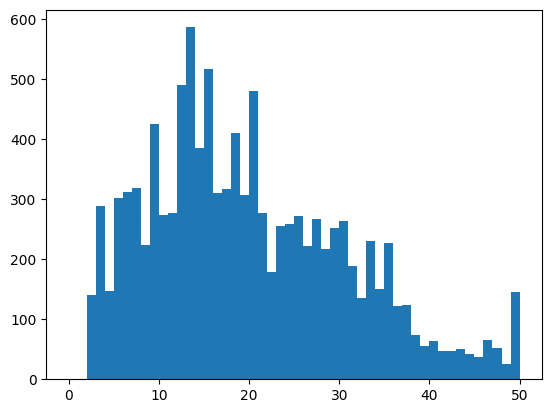

In [50]:
max_len = max(len(s) for s in train_sequences)
print("Max length of sequences:", max_len)
plt.hist([len(s) for s in train_sequences], bins=range(0, max_len + 1, 1))
plt.show()

## Tokenize

In [51]:
vocab = list(set(''.join(sequences)))
vocab.sort()
vocab.insert(0, '<mask>')
vocab.insert(0, '<eos>')
vocab.insert(0, '<bos>')
vocab.insert(0, '<pad>')
vocab

['<pad>',
 '<bos>',
 '<eos>',
 '<mask>',
 ' ',
 "'",
 '(',
 ')',
 '*',
 '-',
 '1',
 '2',
 '3',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z']

In [52]:
import numpy as np

token2id = {token: i for i, token in enumerate(vocab)}
id2token = {i: token for token, i in token2id.items()}

def tokenize(sequence, max_len):
    return [token2id['<bos>']] + [token2id[token] for token in sequence[:max_len]] + [token2id['<eos>']] + [token2id['<pad>']] * max(0, max_len - len(sequence))

X_train = np.array([tokenize(sequence, 50) for sequence in train_sequences])
X_test = np.array([tokenize(sequence, 50) for sequence in test_sequences])

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train[0]

array([ 1, 15, 31, 13, 19, 18, 20, 22, 24, 16, 13, 34, 28, 21, 31, 22, 15,
       27, 22, 29, 13, 18, 21, 19, 22, 27, 29, 22, 31, 13, 28, 18, 31, 18,
       18, 29, 22, 18, 18, 18, 13, 18, 15, 15, 13, 16, 26, 22, 29,  2,  0,
        0])

## Train

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

CONFIG_ENABLE_BIAS = False
CONFIG_POOLING = 'avg'

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation_rate):
        super().__init__()
        self.conv1 = nn.Conv1d(
            in_channels,
            out_channels,
            kernel_size,
            dilation=dilation_rate,
            padding='same',
            bias=CONFIG_ENABLE_BIAS,
        )
        self.conv2 = nn.Conv1d(
            out_channels,
            out_channels,
            kernel_size,
            dilation=dilation_rate,
            padding='same',
            bias=CONFIG_ENABLE_BIAS,
        )
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.act = nn.ReLU()

    def forward(self, x):
        shortcut = x
        x = self.bn1(x)
        x = self.act(x)
        x = self.conv1(x)
        x = self.bn2(x)
        x = self.act(x)
        x = self.conv2(x)
        return x + shortcut

class Model(nn.Module):
    def __init__(self, *, vocab_size, num_classes, dim=512, kernel_size=3, num_layers=4):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, dim, padding_idx=token2id['<pad>'])
        self.blocks = nn.ModuleList([
            Block(dim, dim, kernel_size, 2 ** i)
            for i in range(num_layers)
        ])
        self.bn = nn.BatchNorm1d(dim)
        self.act = nn.ReLU()
        if CONFIG_POOLING == 'avg':
            self.pool = nn.AdaptiveAvgPool1d(1)
        elif CONFIG_POOLING == 'max':
            self.pool = nn.AdaptiveMaxPool1d(1)
        else:
            raise ValueError(f"Invalid pooling type: {CONFIG_POOLING}")
        self.fc = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.embedding(x).transpose(-1, -2)
        for block in self.blocks:
            x = block(x)
        x = self.bn(x)
        x = self.act(x)
        x = self.pool(x).squeeze(-1)
        return F.sigmoid(self.fc(x))

model = Model(
    vocab_size=len(vocab),
    num_classes=10,
    dim=32,
    num_layers=2,
).cuda()

model(torch.tensor(X_train[:1]).cuda())

tensor([[0.5663, 0.4861, 0.4378, 0.5387, 0.4823, 0.5645, 0.5559, 0.4751, 0.4542,
         0.5975]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [55]:
X_train.shape, y_train.shape

((10873, 52), (10873, 10))

In [56]:
import torch.optim as optim
import random
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from skfp.metrics import multioutput_auprc_score
import wandb

CONFIG_BATCH_SIZE = 1024
CONFIG_EPOCHS = 500
CONFIG_OPTIMIZER = 'SGD'
CONFIG_LR = 0.9
CONFIG_MOMENTUM = 0.9
CONFIG_LR_STEP_SIZE = 100
CONFIG_LR_GAMMA = 0.1
CONFIG_MODEL_DIM = 256
CONFIG_MODEL_NUM_LAYERS = 5
CONFIG_AUG_MASK_PROB = 0.15
CONFIG_AUG_REPLACE_PROB = 0.15

model = Model(
    vocab_size=len(vocab),
    num_classes=10,
    dim=CONFIG_MODEL_DIM,
    num_layers=CONFIG_MODEL_NUM_LAYERS,
).cuda()

optimizer = optim.SGD(model.parameters(), lr=CONFIG_LR, momentum=CONFIG_MOMENTUM)
schedule = optim.lr_scheduler.StepLR(optimizer, step_size=CONFIG_LR_STEP_SIZE, gamma=CONFIG_LR_GAMMA)
criterion = nn.BCELoss()

def augumented_collator(examples):
    x, y = zip(*examples)
    x = torch.stack(x)
    y = torch.stack(y)

    mask_prob = CONFIG_AUG_MASK_PROB
    mask_token = token2id['<mask>']

    # Randomly mask tokens
    mask = torch.rand(x.shape).lt(mask_prob)
    mask[x == token2id['<bos>']] = False
    mask[x == token2id['<eos>']] = False
    mask[x == token2id['<pad>']] = False
    x[mask] = mask_token

    random_token_prob = CONFIG_AUG_REPLACE_PROB
    random_tokens = torch.randint(token2id['A'], token2id['Z'], x.shape, dtype=torch.long)

    # Randomly replace tokens with random tokens
    random_mask = torch.rand(x.shape).lt(random_token_prob)
    random_mask[x == token2id['<bos>']] = False
    random_mask[x == token2id['<eos>']] = False
    random_mask[x == token2id['<pad>']] = False
    random_mask[x == mask_token] = False
    x[random_mask] = random_tokens[random_mask]

    return x, y

train_loader = DataLoader(
    TensorDataset(torch.tensor(X_train), torch.tensor(y_train)),
    batch_size=CONFIG_BATCH_SIZE,
    shuffle=True,
    collate_fn=augumented_collator,
)

test_loader = DataLoader(
    TensorDataset(torch.tensor(X_test), torch.tensor(y_test)),
    batch_size=CONFIG_BATCH_SIZE,
    shuffle=False,
)

In [57]:
next(iter(train_loader))

(tensor([[ 1, 25, 29,  ...,  0,  0,  0],
         [ 1, 24, 34,  ...,  0,  0,  0],
         [ 1, 17,  3,  ...,  0,  0,  0],
         ...,
         [ 1, 16,  3,  ...,  0,  0,  0],
         [ 1, 21, 29,  ...,  0,  0,  0],
         [ 1, 27, 27,  ...,  0,  0,  0]]),
 tensor([[0, 0, 0,  ..., 1, 0, 0],
         [0, 0, 1,  ..., 1, 0, 1],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]))

In [58]:
wandb.init(
    project='peptides',
    config={
        'model_enable_bias': CONFIG_ENABLE_BIAS,
        'model_pooling': CONFIG_POOLING,
        'batch_size': CONFIG_BATCH_SIZE,
        'epochs': CONFIG_EPOCHS,
        'optimizer': CONFIG_OPTIMIZER,
        'lr': CONFIG_LR,
        'momentum': CONFIG_MOMENTUM,
        'lr_step_size': CONFIG_LR_STEP_SIZE,
        'lr_gamma': CONFIG_LR_GAMMA,
        'model_dim': CONFIG_MODEL_DIM,
        'model_num_layers': CONFIG_MODEL_NUM_LAYERS,
        'aug_mask_prob': CONFIG_AUG_MASK_PROB,
        'aug_replace_prob': CONFIG_AUG_REPLACE_PROB,
    },
)

step_counter = 0

for epoch in range(CONFIG_EPOCHS):
    model.train()
    total_loss = 0
    iters = 0
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch + 1}/{CONFIG_EPOCHS}') as progress:
        for x, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(x.cuda())
            loss = criterion(y_pred, y.float().cuda())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            iters += 1
            step_counter += 1
            progress.update(1)
            progress.set_postfix(loss=f'{total_loss / iters:.4f}')
            wandb.log({
                'train/step': step_counter,
                'train/epoch': epoch + 1,
                'train/loss': loss.item(),
                'train/learning_rate': optimizer.param_groups[0]['lr'],
            })
    schedule.step()
    model.eval()
    with torch.inference_mode():
        preds = []
        for x, y in test_loader:
            y_pred = model(x.cuda()).cpu().numpy()
            preds.append(y_pred)
        y_pred = np.concatenate(preds)
        print(f"  auprc: {multioutput_auprc_score(y_test, y_pred):.4f}")
        wandb.log({
            'eval/auprc': multioutput_auprc_score(y_test, y_pred),
        })
        if multioutput_auprc_score(y_test, y_pred) > 0.75:
            break

wandb.finish()


eval/auprc,▁▃▃▄▄▅▅▅▆▆▇▇▇▇▇██▇██████████████████████
train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
train/step,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇██
eval/auprc,0.73611
train/epoch,147
train/learning_rate,0.9
train/loss,0.06393
train/step,1611


Epoch 1/500: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s, loss=0.4495]


  auprc: 0.3169


Epoch 2/500: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s, loss=0.3478]


  auprc: 0.3705


Epoch 3/500: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s, loss=0.3047]


  auprc: 0.3909


Epoch 4/500: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s, loss=0.2843]


  auprc: 0.4205


Epoch 5/500: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s, loss=0.2737]


  auprc: 0.4442


Epoch 6/500: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s, loss=0.2625]


  auprc: 0.4451


Epoch 7/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.2567]


  auprc: 0.4845


Epoch 8/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.2493]


  auprc: 0.4911


Epoch 9/500: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s, loss=0.2434]


  auprc: 0.5065


Epoch 10/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.2375]


  auprc: 0.5066


Epoch 11/500: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s, loss=0.2352]


  auprc: 0.5164


Epoch 12/500: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s, loss=0.2300]


  auprc: 0.5481


Epoch 13/500: 100%|██████████| 11/11 [00:03<00:00,  3.54it/s, loss=0.2244]


  auprc: 0.5378


Epoch 14/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.2211]


  auprc: 0.5608


Epoch 15/500: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s, loss=0.2181]


  auprc: 0.5571


Epoch 16/500: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s, loss=0.2135]


  auprc: 0.5528


Epoch 17/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.2106]


  auprc: 0.5706


Epoch 18/500: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s, loss=0.2064]


  auprc: 0.5758


Epoch 19/500: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s, loss=0.2023]


  auprc: 0.5935


Epoch 20/500: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s, loss=0.1981]


  auprc: 0.5801


Epoch 21/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.1986]


  auprc: 0.6104


Epoch 22/500: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s, loss=0.1945]


  auprc: 0.5999


Epoch 23/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.1881]


  auprc: 0.6205


Epoch 24/500: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s, loss=0.1861]


  auprc: 0.6282


Epoch 25/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.1779]


  auprc: 0.6362


Epoch 26/500: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s, loss=0.1777]


  auprc: 0.6252


Epoch 27/500: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s, loss=0.1739]


  auprc: 0.6394


Epoch 28/500: 100%|██████████| 11/11 [00:03<00:00,  3.54it/s, loss=0.1735]


  auprc: 0.6503


Epoch 29/500: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s, loss=0.1703]


  auprc: 0.6541


Epoch 30/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.1687]


  auprc: 0.6502


Epoch 31/500: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s, loss=0.1655]


  auprc: 0.6680


Epoch 32/500: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s, loss=0.1599]


  auprc: 0.6695


Epoch 33/500: 100%|██████████| 11/11 [00:02<00:00,  3.67it/s, loss=0.1594]


  auprc: 0.6445


Epoch 34/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.1580]


  auprc: 0.6719


Epoch 35/500: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s, loss=0.1536]


  auprc: 0.6660


Epoch 36/500: 100%|██████████| 11/11 [00:03<00:00,  3.61it/s, loss=0.1496]


  auprc: 0.6532


Epoch 37/500: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s, loss=0.1496]


  auprc: 0.6693


Epoch 38/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.1486]


  auprc: 0.6857


Epoch 39/500: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s, loss=0.1452]


  auprc: 0.6811


Epoch 40/500: 100%|██████████| 11/11 [00:03<00:00,  3.32it/s, loss=0.1420]


  auprc: 0.6865


Epoch 41/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.1404]


  auprc: 0.6857


Epoch 42/500: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s, loss=0.1388]


  auprc: 0.6939


Epoch 43/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.1373]


  auprc: 0.6721


Epoch 44/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.1391]


  auprc: 0.6863


Epoch 45/500: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s, loss=0.1335]


  auprc: 0.6943


Epoch 46/500: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s, loss=0.1335]


  auprc: 0.6849


Epoch 47/500: 100%|██████████| 11/11 [00:03<00:00,  3.66it/s, loss=0.1312]


  auprc: 0.6918


Epoch 48/500: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s, loss=0.1260]


  auprc: 0.6946


Epoch 49/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.1272]


  auprc: 0.6928


Epoch 50/500: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s, loss=0.1262]


  auprc: 0.7085


Epoch 51/500: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s, loss=0.1246]


  auprc: 0.7099


Epoch 52/500: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s, loss=0.1222]


  auprc: 0.7107


Epoch 53/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.1211]


  auprc: 0.7055


Epoch 54/500: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s, loss=0.1217]


  auprc: 0.7105


Epoch 55/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.1173]


  auprc: 0.7218


Epoch 56/500: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s, loss=0.1175]


  auprc: 0.7180


Epoch 57/500: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s, loss=0.1158]


  auprc: 0.7198


Epoch 58/500: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s, loss=0.1137]


  auprc: 0.7188


Epoch 59/500: 100%|██████████| 11/11 [00:03<00:00,  3.66it/s, loss=0.1134]


  auprc: 0.7203


Epoch 60/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.1106]


  auprc: 0.7261


Epoch 61/500: 100%|██████████| 11/11 [00:03<00:00,  3.38it/s, loss=0.1091]


  auprc: 0.7155


Epoch 62/500: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s, loss=0.1097]


  auprc: 0.7216


Epoch 63/500: 100%|██████████| 11/11 [00:02<00:00,  3.69it/s, loss=0.1091]


  auprc: 0.7198


Epoch 64/500: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s, loss=0.1073]


  auprc: 0.7109


Epoch 65/500: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s, loss=0.1073]


  auprc: 0.7183


Epoch 66/500: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s, loss=0.1046]


  auprc: 0.7230


Epoch 67/500: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s, loss=0.1015]


  auprc: 0.7196


Epoch 68/500: 100%|██████████| 11/11 [00:02<00:00,  3.70it/s, loss=0.1024]


  auprc: 0.7242


Epoch 69/500: 100%|██████████| 11/11 [00:02<00:00,  3.70it/s, loss=0.1033]


  auprc: 0.7207


Epoch 70/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.1035]


  auprc: 0.7039


Epoch 71/500: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s, loss=0.1029]


  auprc: 0.7289


Epoch 72/500: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s, loss=0.1007]


  auprc: 0.7204


Epoch 73/500: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s, loss=0.0990]


  auprc: 0.7233


Epoch 74/500: 100%|██████████| 11/11 [00:03<00:00,  3.61it/s, loss=0.0973]


  auprc: 0.7265


Epoch 75/500: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s, loss=0.0977]


  auprc: 0.7167


Epoch 76/500: 100%|██████████| 11/11 [00:02<00:00,  3.74it/s, loss=0.0961]


  auprc: 0.7209


Epoch 77/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.0952]


  auprc: 0.7231


Epoch 78/500: 100%|██████████| 11/11 [00:02<00:00,  3.72it/s, loss=0.0944]


  auprc: 0.7249


Epoch 79/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.0944]


  auprc: 0.7275


Epoch 80/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.0931]


  auprc: 0.7348


Epoch 81/500: 100%|██████████| 11/11 [00:03<00:00,  3.38it/s, loss=0.0900]


  auprc: 0.7358


Epoch 82/500: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s, loss=0.0902]


  auprc: 0.7361


Epoch 83/500: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s, loss=0.0917]


  auprc: 0.7329


Epoch 84/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.0902]


  auprc: 0.7326


Epoch 85/500: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s, loss=0.0871]


  auprc: 0.7373


Epoch 86/500: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s, loss=0.0884]


  auprc: 0.7381


Epoch 87/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.0903]


  auprc: 0.7135


Epoch 88/500: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s, loss=0.0874]


  auprc: 0.7320


Epoch 89/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.0898]


  auprc: 0.7329


Epoch 90/500: 100%|██████████| 11/11 [00:03<00:00,  3.66it/s, loss=0.0862]


  auprc: 0.7354


Epoch 91/500: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s, loss=0.0862]


  auprc: 0.7373


Epoch 92/500: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s, loss=0.0845]


  auprc: 0.7303


Epoch 93/500: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s, loss=0.0831]


  auprc: 0.7413


Epoch 94/500: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s, loss=0.0829]


  auprc: 0.7364


Epoch 95/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.0851]


  auprc: 0.7422


Epoch 96/500: 100%|██████████| 11/11 [00:02<00:00,  3.74it/s, loss=0.0830]


  auprc: 0.7435


Epoch 97/500: 100%|██████████| 11/11 [00:02<00:00,  3.77it/s, loss=0.0844]


  auprc: 0.7367


Epoch 98/500: 100%|██████████| 11/11 [00:02<00:00,  3.76it/s, loss=0.0830]


  auprc: 0.7398


Epoch 99/500: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s, loss=0.0823]


  auprc: 0.7412


Epoch 100/500: 100%|██████████| 11/11 [00:02<00:00,  3.75it/s, loss=0.0790]


  auprc: 0.7381


Epoch 101/500: 100%|██████████| 11/11 [00:02<00:00,  3.72it/s, loss=0.0745]


  auprc: 0.7443


Epoch 102/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.0722]


  auprc: 0.7483


Epoch 103/500: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s, loss=0.0674]


  auprc: 0.7494


Epoch 104/500: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s, loss=0.0685]


  auprc: 0.7500


eval/auprc,▁▂▃▄▄▅▅▅▆▆▆▆▇▇▆▇▇▇▇█▇█▇▇██▇█████████████
train/epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇███
train/learning_rate,███████████████████████████████████████▁
train/loss,█▇▆▅▅▄▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁
train/step,▁▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇█████
eval/auprc,0.75002
train/epoch,104
train/learning_rate,0.09
train/loss,0.06498
train/step,1144


In [65]:
from safetensors.torch import save_model

model_path = "lrgb-cnn.safetensors"
save_model(model, model_path)

In [67]:
model.eval()
y_pred = []
with torch.inference_mode():
    for x, y in test_loader:
        y_pred.append(model(x.cuda()).cpu().numpy())
y_pred = np.concatenate(y_pred)
np.savez("preds.npz", y_pred=y_pred)

In [68]:
from sklearn.metrics import average_precision_score

print(average_precision_score(y_test, y_pred, average='macro'))

0.7500233662697199


In [69]:
from skfp.metrics import multioutput_auprc_score

print(multioutput_auprc_score(y_test, y_pred))

0.7500233662697199
